In [9]:
#RandomForest

In [10]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import itertools 

#Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

In [11]:
#Se define la la función que muestra la matriz de confusión
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks([-0.5,0,1,2,2.5], ["","carton","cristal","plastico"])

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalizar matriz de confusion")
    #else:
        #print('Matriz de confusion')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
train = np.load ('train.npy')
test = np.load ('test.npy')

In [13]:
print(len(train),len(train[0]),len(train[0][0]))

10 270 582


In [14]:
modelo = RandomForestClassifier(n_estimators=100) #se prueban desde 20 a 100

Particion  1
Tasa de acierto: 0.8333333333333334


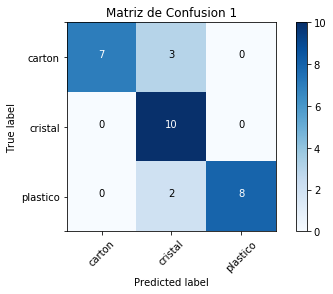

Particion  2
Tasa de acierto: 0.8333333333333334


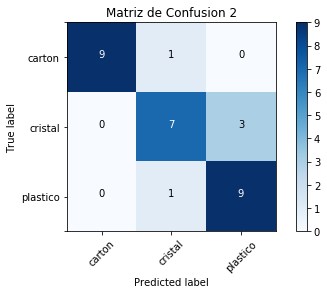

Particion  3
Tasa de acierto: 0.9333333333333333


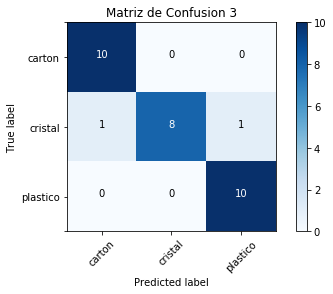

Particion  4
Tasa de acierto: 0.9


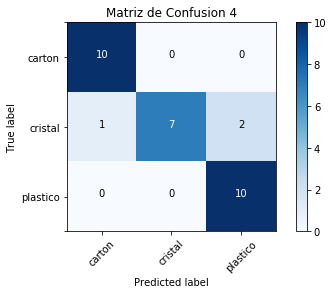

Particion  5
Tasa de acierto: 0.9


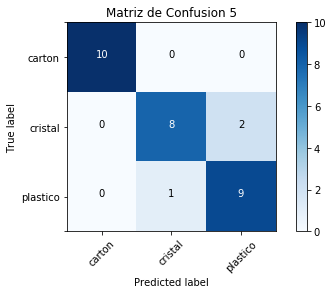

Particion  6
Tasa de acierto: 0.8666666666666667


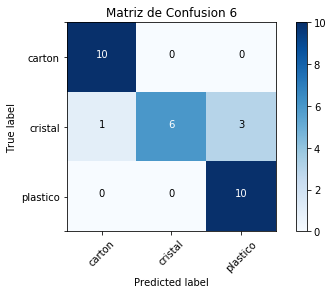

Particion  7
Tasa de acierto: 0.8666666666666667


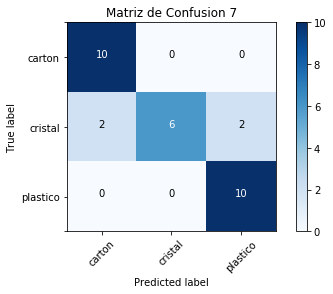

Particion  8
Tasa de acierto: 0.8666666666666667


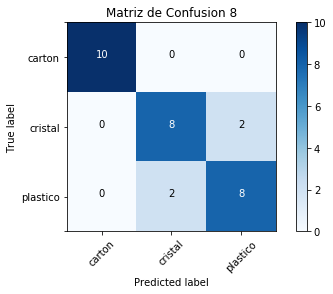

Particion  9
Tasa de acierto: 0.8


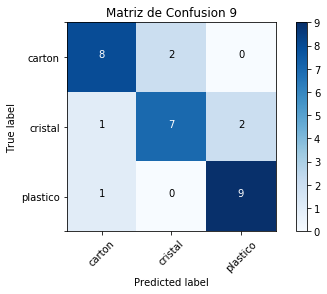

Particion  10
Tasa de acierto: 0.8333333333333334


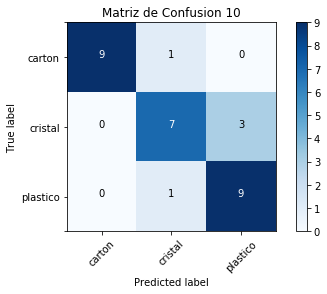

TODAS LAS PARTICIONES
Tasa de acierto promedio:  0.8633


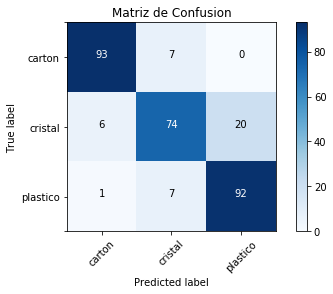

In [15]:
x_train = list()
y_train = list()
x_test = list()
y_test = list()
y_prds = list()
y_prds2 = list()
y_test2 = list()
media = 0


#Entrenamos el modelo dejando fuera una vista por objeto en cada interacción con las particiones ya creadas
for i in range(len(train)):
    x_train = list()
    x_test = list()
    y_train = list()
    y_test = list()
    print("Particion ", i + 1)
    
    y_train = np.array(["carton"]*int(train[i].shape[0]/3) 
                    +  ["plastico"]*int(train[i].shape[0]/3) 
                    +  ["cristal"]*int(train[i].shape[0]/3))
    y_test = np.array(["carton"]*int(test[i].shape[0]/3) 
                   +  ["plastico"]*int(test[i].shape[0]/3) 
                   +  ["cristal"]*int(test[i].shape[0]/3))
    #print(len(y_train[0]))
    x_train = train[i]
    x_test = test[i]
    
    #for j in range(len(train[i])):
    #    x_train.append(train[i][j])
            
    modelo.fit(x_train,y_train)
    
    y_prds = modelo.predict(x_test)
    score = metrics.accuracy_score(y_test, y_prds)
    
    y_test2.extend(y_test)
    y_prds2.extend(y_prds)
    
    print('Tasa de acierto:',score)
    media += score
    
    #Confusion matrix
    #cm = confusion_matrix(y_test, y_prds)
    plt.figure() #num=None, figsize=(8, 6), dpi=80
    plot_confusion_matrix(confusion_matrix(y_test, y_prds), classes= ["carton","cristal","plastico"], 
                          title='Matriz de Confusion ' + str(i+1))
    plt.show()

print("TODAS LAS PARTICIONES")
print("Tasa de acierto promedio: {0: 0.4f}".format(media/len(test)))

#Confusion matrix (TODO)
#cm = confusion_matrix(y_test2, y_prds2)
plt.figure() #num=None, figsize=(8, 6), dpi=80
plot_confusion_matrix(confusion_matrix(y_test2, y_prds2), classes= ["carton","cristal","plastico"], 
                      title='Matriz de Confusion')
plt.show()

# -------------------------------------------------------------------------------

In [40]:
#Elegimos la partición 5 para continuar
modelo = RandomForestClassifier(n_estimators=40)#se añade el numero de arboles

In [146]:
x_train = list()
y_train = list()
x_test = list()
y_test = list()
y_prds = list()
y_prds2 = list()
y_test2 = list()
media = 0

#x_train = list()
#y_train = list()

i=4 #Particion5

print("Particion ", i + 1)

y_train = np.array(["carton"]*int(train[i].shape[0]/3) 
                +  ["plastico"]*int(train[i].shape[0]/3) 
                +  ["cristal"]*int(train[i].shape[0]/3))
y_test = np.array(["carton"]*int(test[i].shape[0]/3) 
               +  ["plastico"]*int(test[i].shape[0]/3) 
               +  ["cristal"]*int(test[i].shape[0]/3))
#print(len(y_train[0]))
x_train = train[i]
x_test = test[i]

#for j in range(len(train[i])):
#    x_train.append(train[i][j])

modelo.fit(x_train,y_train)

y_prds = modelo.predict(x_test)
score = metrics.accuracy_score(y_test, y_prds)

y_test2.extend(y_test)
y_prds2.extend(y_prds)

print('Tasa de acierto:',score)
media += score

Particion  5
Precisión: 0.8666666666666667


In [147]:
len(y_test2), len(y_prds2)


(30, 30)

In [148]:
#Comparamos la lectura real con la predicción
comp = pd.DataFrame({'real' : y_test2, 'preds' : y_prds2 })
#comp = pd.DataFrame({'real' : y_test, 'p1' : y_prds[0], 'p2' : y_prds[1], 'p3' : y_prds[2], 'p4' : y_prds[3], 'p5' : y_prds[4], 'p6' : y_prds[5], 'p7' : y_prds[6], 'p8' : y_prds[7], 'p9' : y_prds[8], 'p10' : y_prds[9] })
comp

,real,preds
0,carton,carton
1,carton,carton
2,carton,carton
3,carton,carton
4,carton,carton
5,carton,cristal
6,carton,carton
7,carton,plastico
8,carton,carton
9,carton,carton


In [149]:
#Precision de la predicción
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test2, y_prds2)
print("Tasa de acierto:", accuracy)

Precisión: 0.8666666666666667


array([[ 8,  1,  1],
       [ 1,  8,  1],
       [ 0,  0, 10]], dtype=int64)

Matriz de confusion
[[ 8  1  1]
 [ 1  8  1]
 [ 0  0 10]]


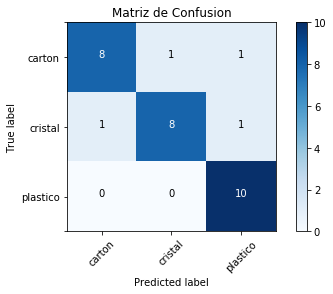

In [154]:
import joblib 

In [155]:
joblib.dump(modelo, 'modeloRandomForest.pkl')

['modeloRandomForest.pkl']

In [156]:
modelo.predict(test[8])

array(['carton', 'carton', 'carton', 'carton', 'carton', 'carton',
       'carton', 'carton', 'carton', 'carton', 'plastico', 'plastico',
       'plastico', 'plastico', 'plastico', 'plastico', 'plastico',
       'plastico', 'plastico', 'plastico', 'cristal', 'cristal',
       'cristal', 'cristal', 'cristal', 'cristal', 'cristal', 'cristal',
       'cristal', 'cristal'], dtype='<U8')

In [157]:
modelo.predict([test[5][6],test[8][10],test[1][29]])

array(['carton', 'plastico', 'cristal'], dtype='<U8')